# Note on Social Network Analysis
This note is based on [Methods for Network Analysis](https://bookdown.org/markhoff/social_network_analysis/)

## Data Preparation

In [19]:
library(igraph)

personA <- c("Mark", "Mark", "Peter", "Peter", "Bob", "Jill")
personB <- c("Peter", "Jill", "Bob", "Aaron", "Jill", "Aaron")
edgelist <- data.frame(PersonA = personA, PersonB = personB, stringsAsFactors = F)

adjacency <- matrix(c(0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0), nrow = 5, ncol = 5, dimnames = list(c("Mark", "Peter", "Bob", "Jill", "Aaron"), c("Mark", "Peter", "Bob", "Jill", "Aaron")))

money_edgelist <- as.matrix(edgelist)
moneyNetwork <- graph.edgelist(money_edgelist, directed=TRUE)
moneyNetwork #summary: this is a igraph object and a directed network (DN), with 5 nodes and 6 edges.
V(moneyNetwork)$name #check its attribute "name" for the vertices.

IGRAPH 0045e6a DN-- 5 6 -- 
+ attr: name (v/c)
+ edges from 0045e6a (vertex names):
[1] Mark ->Peter Mark ->Jill  Peter->Bob   Peter->Aaron Bob  ->Jill 
[6] Jill ->Aaron

[1] "Mark"  "Peter" "Jill"  "Bob"   "Aaron"

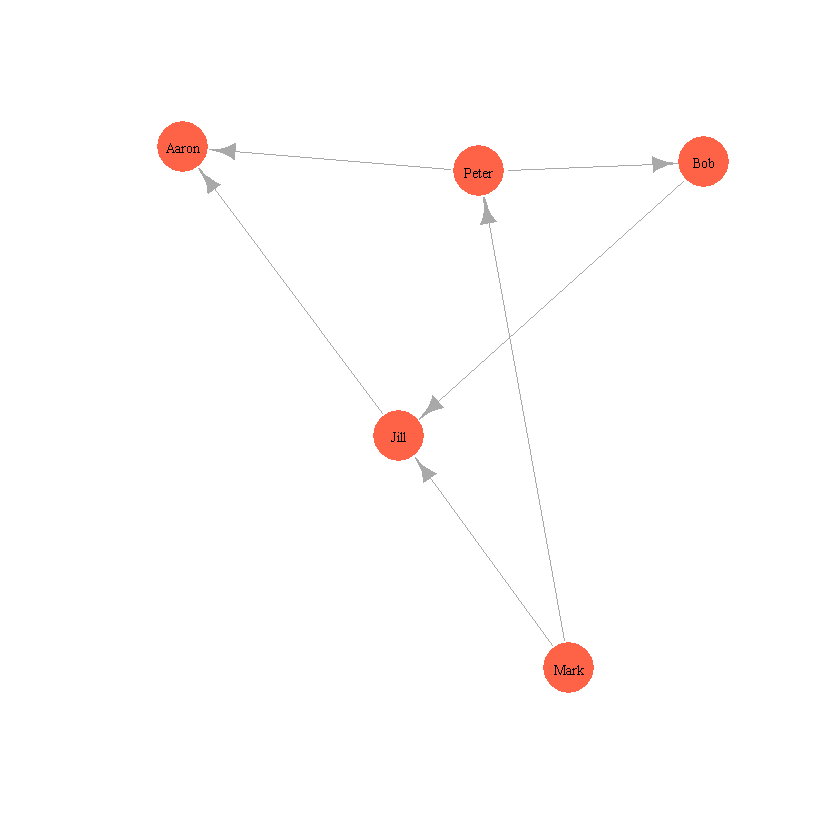

In [28]:
plot(moneyNetwork, vertex.size = 20, vertex.color = "tomato", vertex.frame.color = NA, vertex.label.cex = .7, vertex.label.color = "black")
# vertex.label = NA No label
# edge.curved = .1 curve edge, but it should not be larger than .1; otherwise the plot will be very strange.

The plot function may not output the same layout. To plot the network at a given way, we should set the layout before.

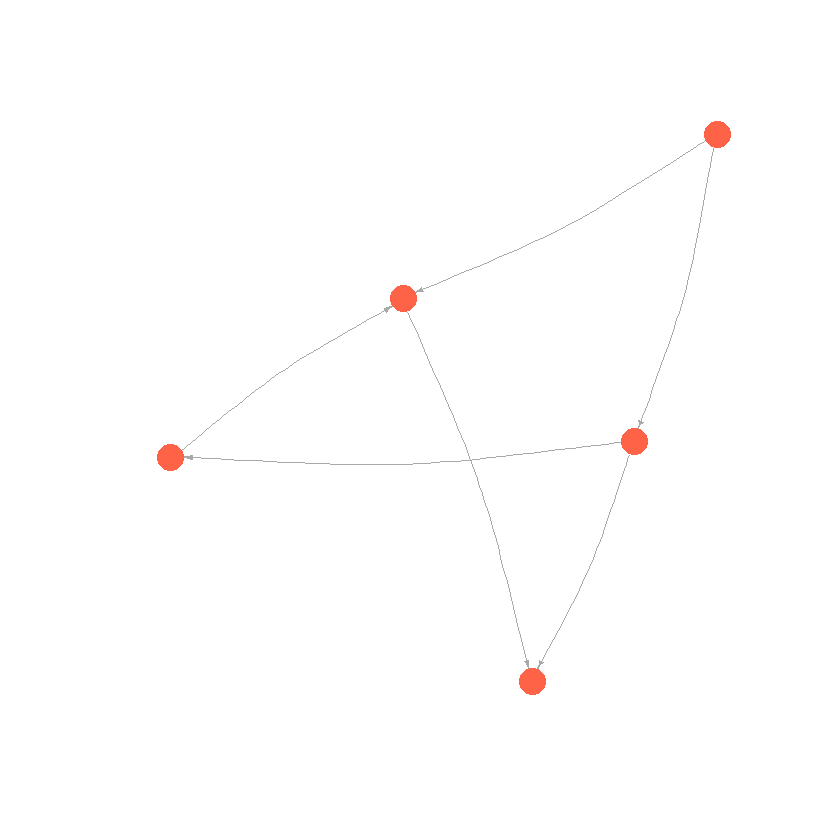

In [25]:
kamadaLayout <- layout.kamada.kawai(moneyNetwork)
# e.g., layout.fruchterman.reingold
plot(moneyNetwork, layout = kamadaLayout, vertex.size = 10, vertex.color = "tomato", vertex.frame.color = NA, vertex.label.cex = .7,  vertex.label = NA, edge.curved = .1, edge.arrow.size = .3, edge.width = .7)

In [33]:
personA <- c("Mark", "Mark", "Peter", "Peter", "Bob", "Jill")
personB <- c("Peter", "Jill", "Bob", "Aaron", "Jill", "Aaron")
edgelist <- data.frame(PersonA = personA, PersonB = personB, stringsAsFactors = F)
money_edgelist <- as.matrix(edgelist)
name <- c("Mark", "Peter", "Bob", "Jill", "Aaron")
age <- c(53, 52, 25, 23, 19)
gender <- c("Male", "Female", "Male", "Female", "Female")
attributelist <- data.frame(Name = name, Age = age, Gender = gender, stringsAsFactors = F)
money_attributelist <- as.matrix(attributelist)
moneyNetwork <- graph_from_data_frame(money_edgelist, directed=TRUE, vertices = money_attributelist)
moneyNetwork
V(moneyNetwork)$Gender 

IGRAPH 88a9de3 DN-- 5 6 -- 
+ attr: name (v/c), Age (v/c), Gender (v/c)
+ edges from 88a9de3 (vertex names):
[1] Mark ->Peter Mark ->Jill  Peter->Bob   Peter->Aaron Bob  ->Jill 
[6] Jill ->Aaron

[1] "Male"   "Female" "Male"   "Female" "Female"

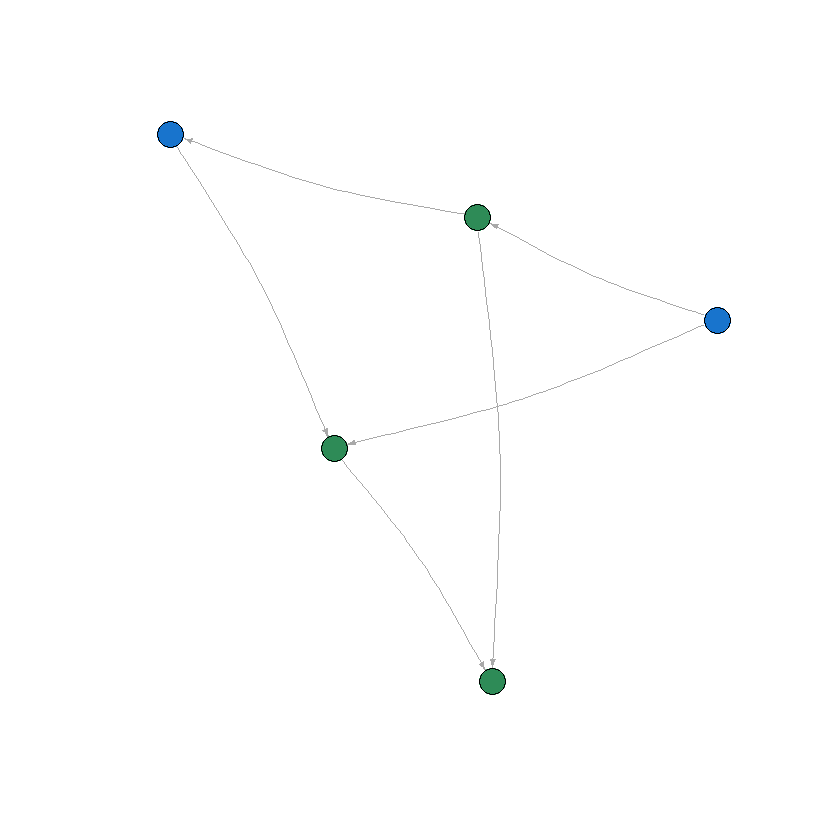

In [35]:
V(moneyNetwork)$color <- ifelse(V(moneyNetwork)$Gender == "Male", "dodgerblue3","seagreen")
kamadaLayout <- layout.kamada.kawai(moneyNetwork)
plot(moneyNetwork, layout = kamadaLayout, vertex.size = 10, vertex.frame.color = "black", vertex.label.cex = .7, vertex.label = NA, edge.curved = .1, edge.arrow.size = .3)